<a href="https://colab.research.google.com/github/MariosAvraam/Police-Killings-in-US/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Unzip Data

In [2]:
!unzip "Fatal+Force+(start).zip"

Archive:  Fatal+Force+(start).zip
replace Deaths_by_Police_US.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Deaths_by_Police_US.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Median_Household_Income_2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Median_Household_Income_2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Pct_Over_25_Completed_High_School.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Pct_Over_25_Completed_High_School.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Pct_People_Below_Poverty_Level.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Pct_People_Below_Poverty_Level.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Share_of_Race_By_City.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Share_of_Race_By_City.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Fatal_Force_(start).ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Fatal_Force_(st

## Import Statements

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_hh_income.shape)
print(df_hh_income.columns)
print(f"{df_hh_income.isnull().sum()} \n {df_hh_income.duplicated().sum()}\n\n")

(29322, 3)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Geographic Area     0
City                0
Median Income      51
dtype: int64 
 0




In [7]:
print(df_pct_poverty.shape)
print(df_pct_poverty.columns)
print(f"{df_pct_poverty.isnull().sum()} \n {df_pct_poverty.duplicated().sum()}\n\n")

(29329, 3)
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Geographic Area    0
City               0
poverty_rate       0
dtype: int64 
 0




In [8]:
print(df_pct_completed_hs.shape)
print(df_pct_completed_hs.columns)
print(f"{df_pct_completed_hs.isnull().sum()} \n {df_pct_completed_hs.duplicated().sum()}\n\n")

(29329, 3)
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64 
 0




In [9]:
print(df_share_race_city.shape)
print(df_share_race_city.columns)
print(f"{df_share_race_city.isnull().sum()} \n {df_share_race_city.duplicated().sum()}\n\n")

(29268, 7)
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64 
 0




In [10]:
print(df_fatalities.shape)
print(df_fatalities.columns)
print(f"{df_fatalities.isnull().sum()} \n {df_fatalities.duplicated().sum()}\n\n")

(2535, 14)
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64 
 0




## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [11]:
# Convert valid numerical strings to numbers and set invalid strings to NaN for df_hh_income
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')

# Now replace NaN values with the median for df_hh_income
df_hh_income['Median Income'].fillna(df_hh_income['Median Income'].median(), inplace=True)

print(f"{df_hh_income.isnull().sum()} \n {df_hh_income.duplicated().sum()}\n\n")

Geographic Area    0
City               0
Median Income      0
dtype: int64 
 0




In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty['poverty_rate'].fillna(df_pct_poverty['poverty_rate'].median(), inplace=True)
print(f"{df_pct_poverty.isnull().sum()} \n {df_pct_poverty.duplicated().sum()}\n\n")

Geographic Area    0
City               0
poverty_rate       0
dtype: int64 
 0




In [13]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'].fillna(df_pct_completed_hs['percent_completed_hs'].median(), inplace=True)
print(f"{df_pct_completed_hs.isnull().sum()} \n {df_pct_completed_hs.duplicated().sum()}\n\n")

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64 
 0




In [14]:
# Redefine columns_to_fill_race
columns_to_fill_race = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Continue with NaN handling for df_share_race_city
for column in columns_to_fill_race:
    df_share_race_city[column] = pd.to_numeric(df_share_race_city[column], errors='coerce')
    df_share_race_city[column].fillna(df_share_race_city[column].median(), inplace=True)

print(f"{df_share_race_city.isnull().sum()} \n {df_share_race_city.duplicated().sum()}\n\n")

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64 
 0




In [15]:
df_fatalities['armed'].fillna('Unknown', inplace=True)
df_fatalities['age'].fillna(df_fatalities['age'].median(), inplace=True)
df_fatalities['race'].fillna('Unknown', inplace=True)
df_fatalities['flee'].fillna('Unknown', inplace=True)

In [16]:
# Confirm that NaN values have been handled
nan_values_summary_updated = {
    "df_hh_income": df_hh_income.isnull().sum().max(),
    "df_pct_poverty": df_pct_poverty.isnull().sum().max(),
    "df_pct_completed_hs": df_pct_completed_hs.isnull().sum().max(),
    "df_share_race_city": df_share_race_city.isnull().sum().max(),
    "df_fatalities": df_fatalities.isnull().sum().max()
}

nan_values_summary_updated

{'df_hh_income': 0,
 'df_pct_poverty': 0,
 'df_pct_completed_hs': 0,
 'df_share_race_city': 0,
 'df_fatalities': 0}

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [17]:
# Group by "Geographic Area" and calculate the median poverty rate for each state
state_poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].median().sort_values(ascending=False)
state_poverty_rate.head()

Geographic Area
MS   26.45
GA   23.30
AR   22.30
SC   22.10
LA   20.95
Name: poverty_rate, dtype: float64

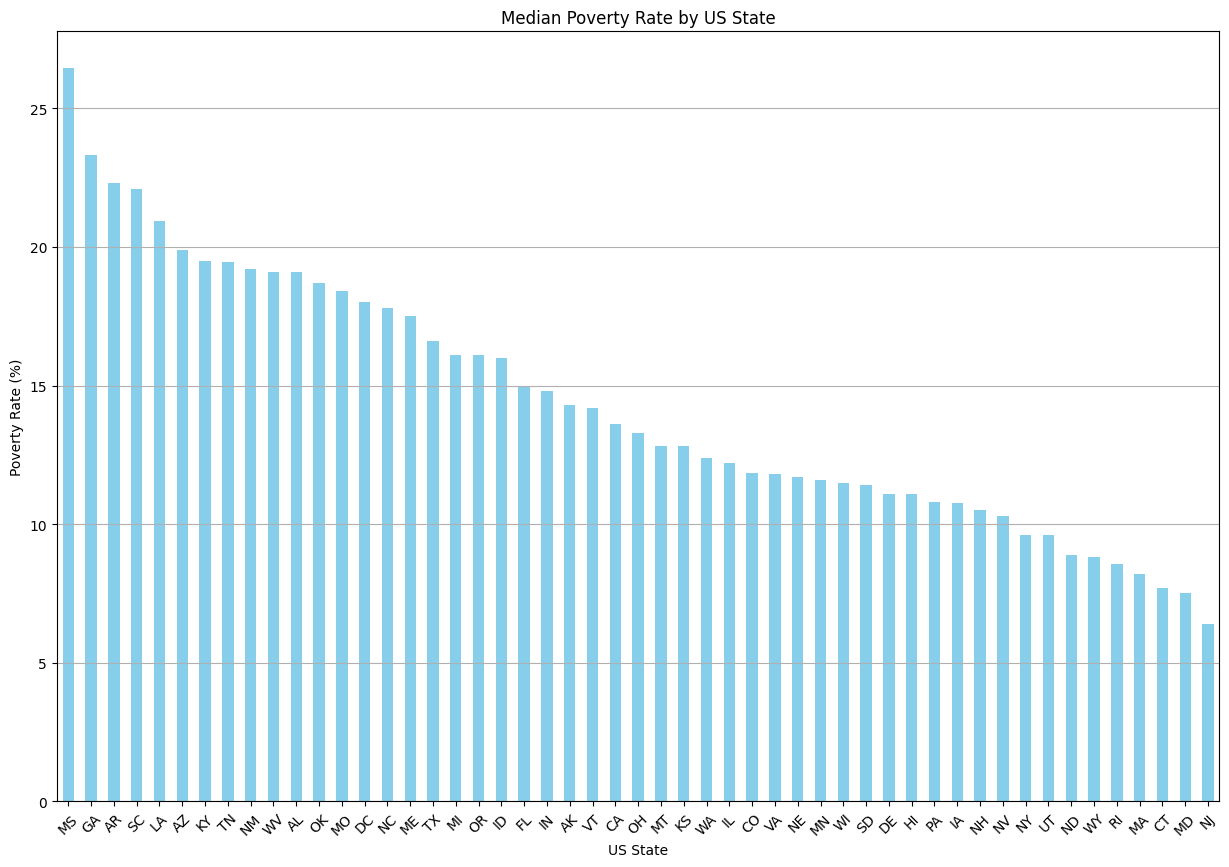

In [18]:
# Plotting
plt.figure(figsize=(15,10))
state_poverty_rate.plot(kind='bar', color='skyblue')
plt.title('Median Poverty Rate by US State')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('US State')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [19]:
# Identify the states with the highest and lowest poverty rates
highest_poverty_state = state_poverty_rate.idxmax()
lowest_poverty_state = state_poverty_rate.idxmin()

highest_poverty_state, lowest_poverty_state

('MS', 'NJ')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [20]:
# Group by "Geographic Area" and calculate the median high school graduation rate for each state
state_hs_grad_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].median().sort_values()
state_hs_grad_rate.head()

Geographic Area
MS   78.30
GA   79.40
LA   80.05
TX   80.50
AR   81.10
Name: percent_completed_hs, dtype: float64

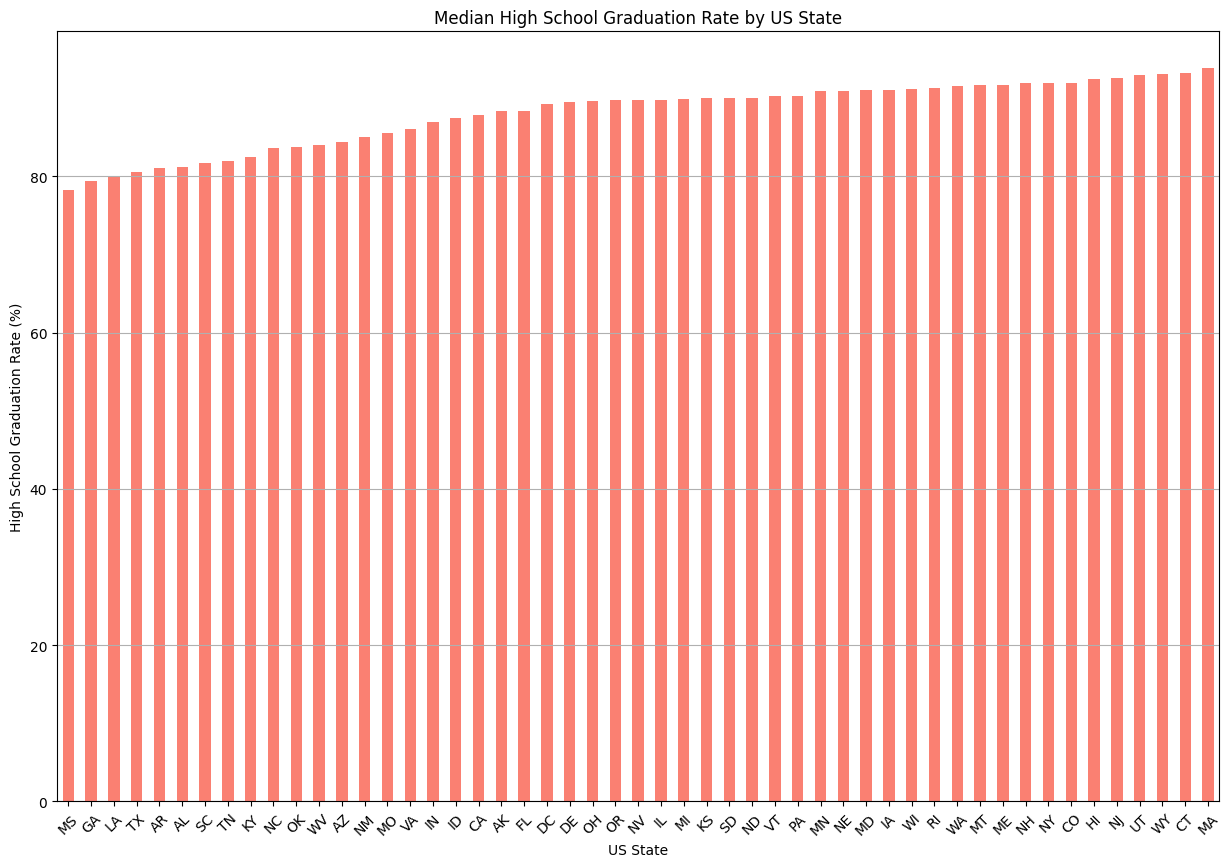

In [21]:
# Plotting
plt.figure(figsize=(15,10))
state_hs_grad_rate.plot(kind='bar', color='salmon')
plt.title('Median High School Graduation Rate by US State')
plt.ylabel('High School Graduation Rate (%)')
plt.xlabel('US State')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [22]:
# Merging the datasets on "Geographic Area" and "City"
merged_df = pd.merge(df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City'], suffixes=('_poverty', '_hs'))

# Group by "Geographic Area" and compute the median values for both poverty rates and high school graduation rates
grouped_df = merged_df.groupby('Geographic Area').median()

grouped_df

<ipython-input-22-1fafd44dd07d>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = merged_df.groupby('Geographic Area').median()


,poverty_rate,percent_completed_hs
Geographic Area,,
AK,14.30,88.40
AL,19.10,81.20
AR,22.30,81.10
AZ,19.90,84.40
CA,13.60,87.80
CO,11.85,91.95
CT,7.70,93.20
DC,18.00,89.30
DE,11.10,89.50


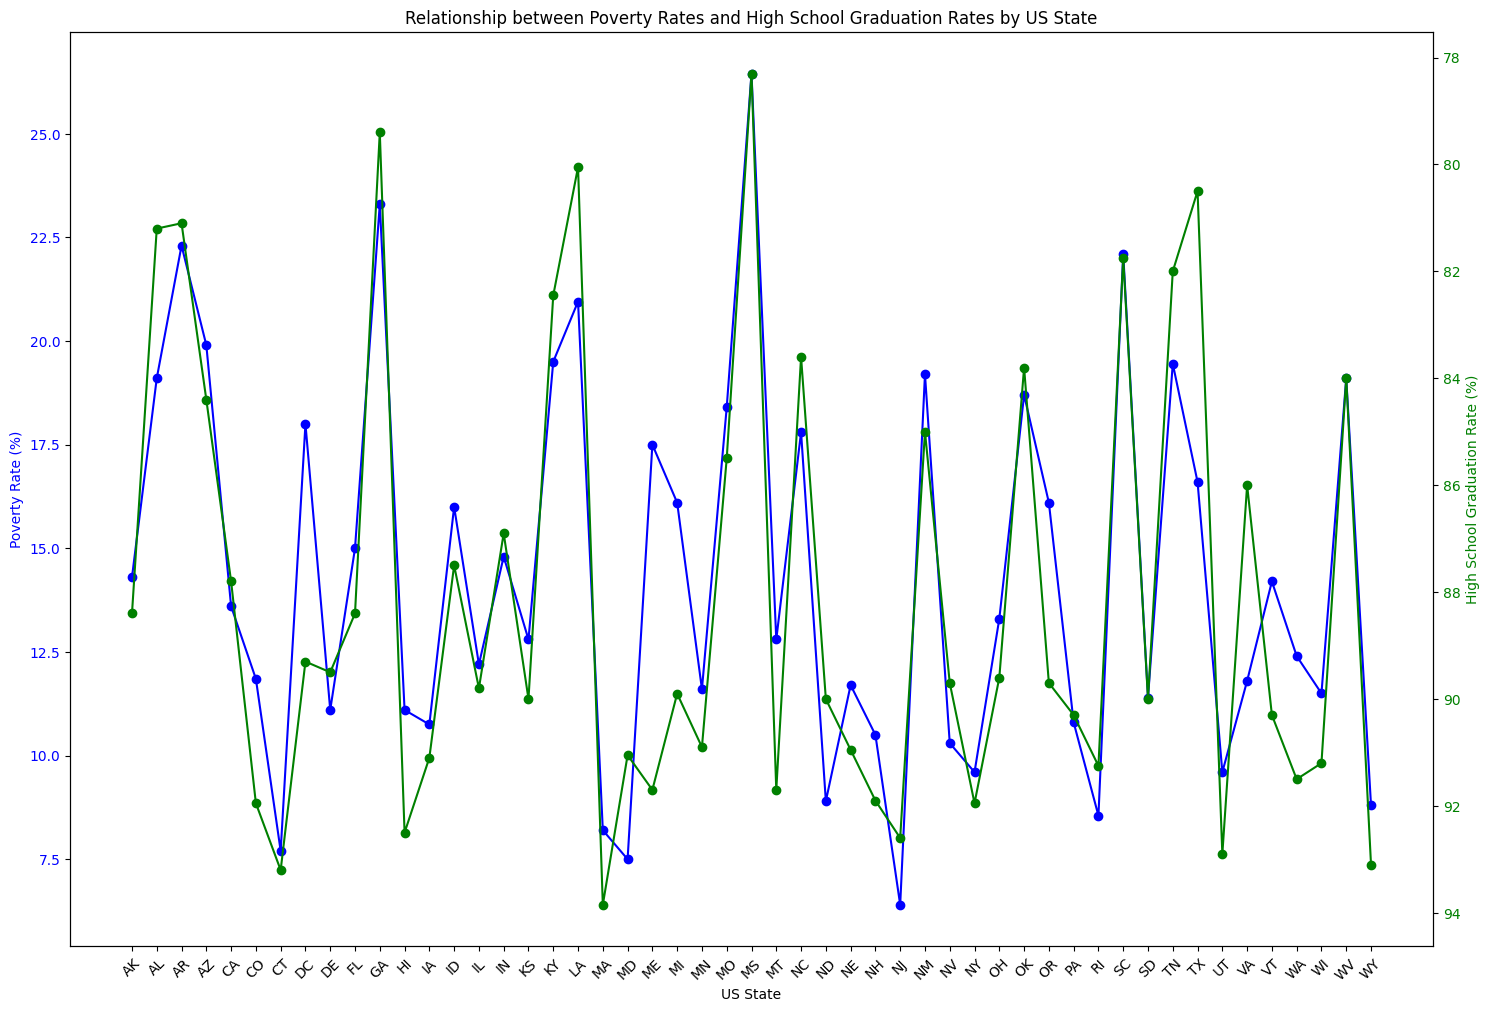

In [23]:
# Plotting with two y-axes, dots for each data point, and one y-axis in descending order
fig, ax1 = plt.subplots(figsize=(15,10))

# First y-axis for poverty rate
ax1.set_xlabel('US State')
ax1.set_ylabel('Poverty Rate (%)', color='blue')
ax1.plot(grouped_df.index, grouped_df['poverty_rate'], color='blue', label='Poverty Rate', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(grouped_df.index)
ax1.set_xticklabels(grouped_df.index, rotation=45)

# Create a second y-axis for high school graduation rate
ax2 = ax1.twinx()
ax2.set_ylabel('High School Graduation Rate (%)', color='green')
ax2.plot(grouped_df.index, grouped_df['percent_completed_hs'], color='green', label='High School Graduation Rate', marker='o')
ax2.tick_params(axis='y', labelcolor='green')
ax2.invert_yaxis()  # Invert the y-axis

# Set title and show the plot
fig.tight_layout()
plt.title('Relationship between Poverty Rates and High School Graduation Rates by US State')
plt.grid(axis='x')
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

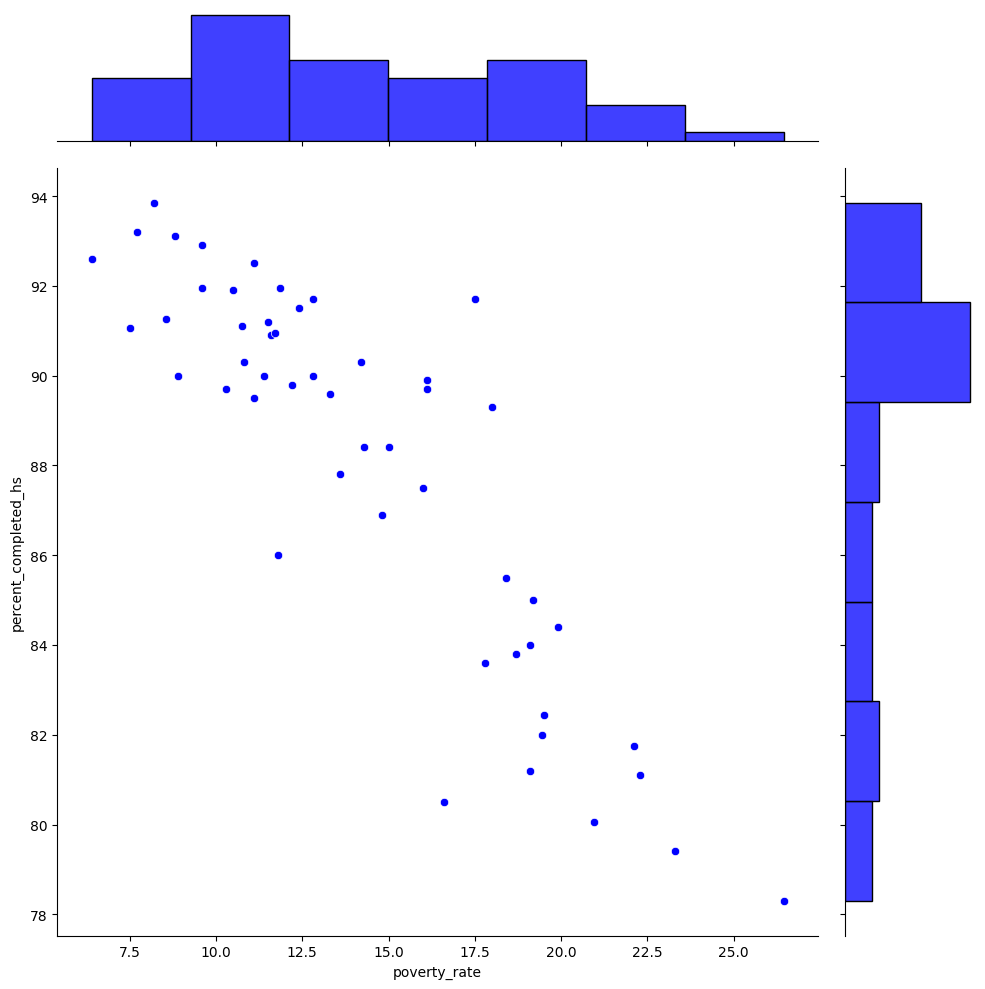

In [24]:
# Create a Seaborn jointplot with KDE and scatter plot
sns.jointplot(x=grouped_df['poverty_rate'], y=grouped_df['percent_completed_hs'], kind='scatter', color='blue', height=10)

plt.show()

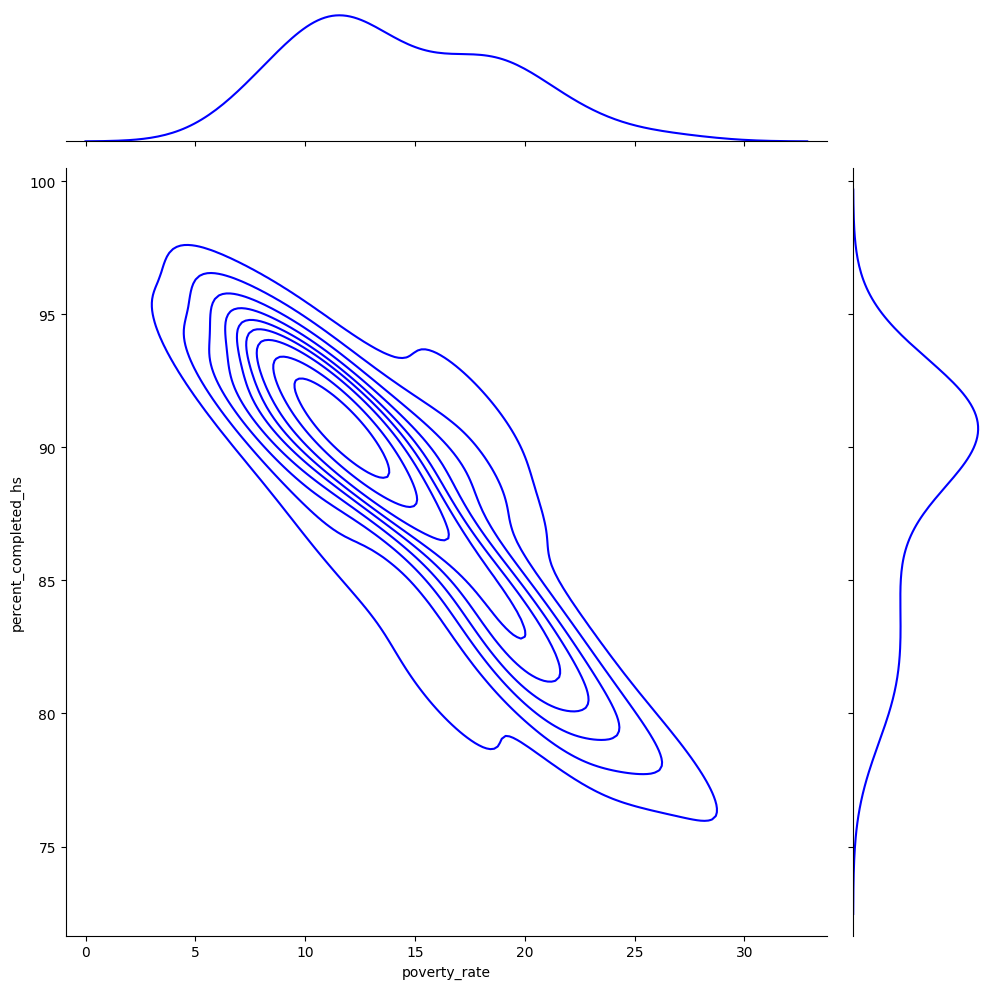

In [25]:
sns.jointplot(x=grouped_df['poverty_rate'], y=grouped_df['percent_completed_hs'], kind='kde', color='blue', height=10)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

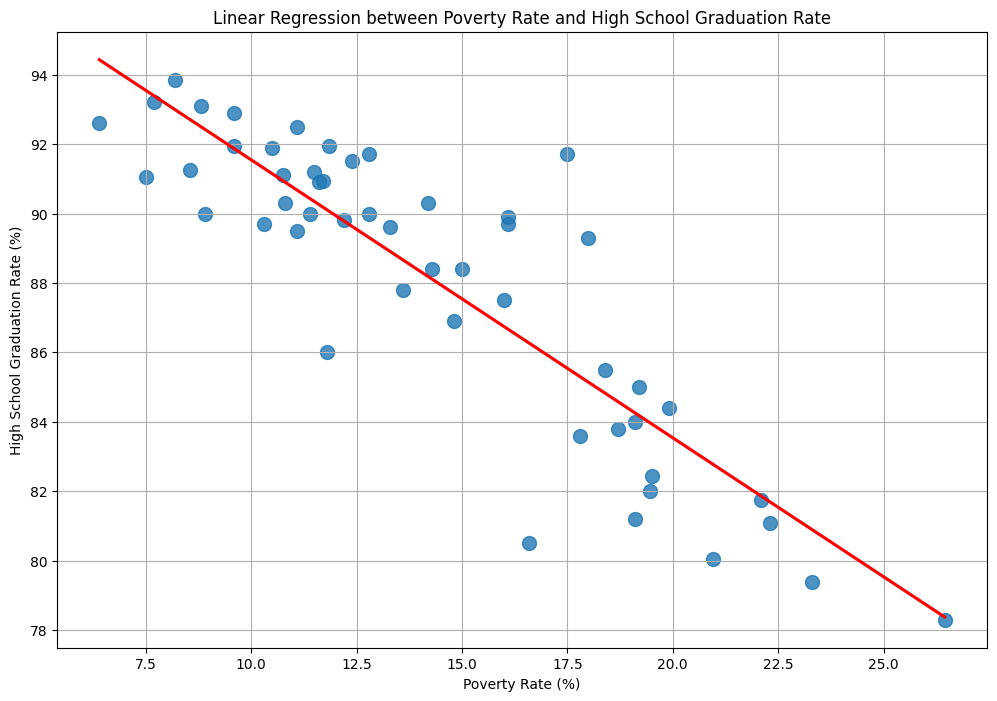

In [26]:
# Plotting using Seaborn's regplot to show a linear regression
plt.figure(figsize=(12, 8))
sns.regplot(x=grouped_df['poverty_rate'], y=grouped_df['percent_completed_hs'], scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.title('Linear Regression between Poverty Rate and High School Graduation Rate')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.grid(True)
plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [27]:
# Group by "Geographic area" and compute the median values for each racial group
racial_grouped_df = df_share_race_city.groupby('Geographic area').median()

<ipython-input-27-14fe0757f7f9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  racial_grouped_df = df_share_race_city.groupby('Geographic area').median()


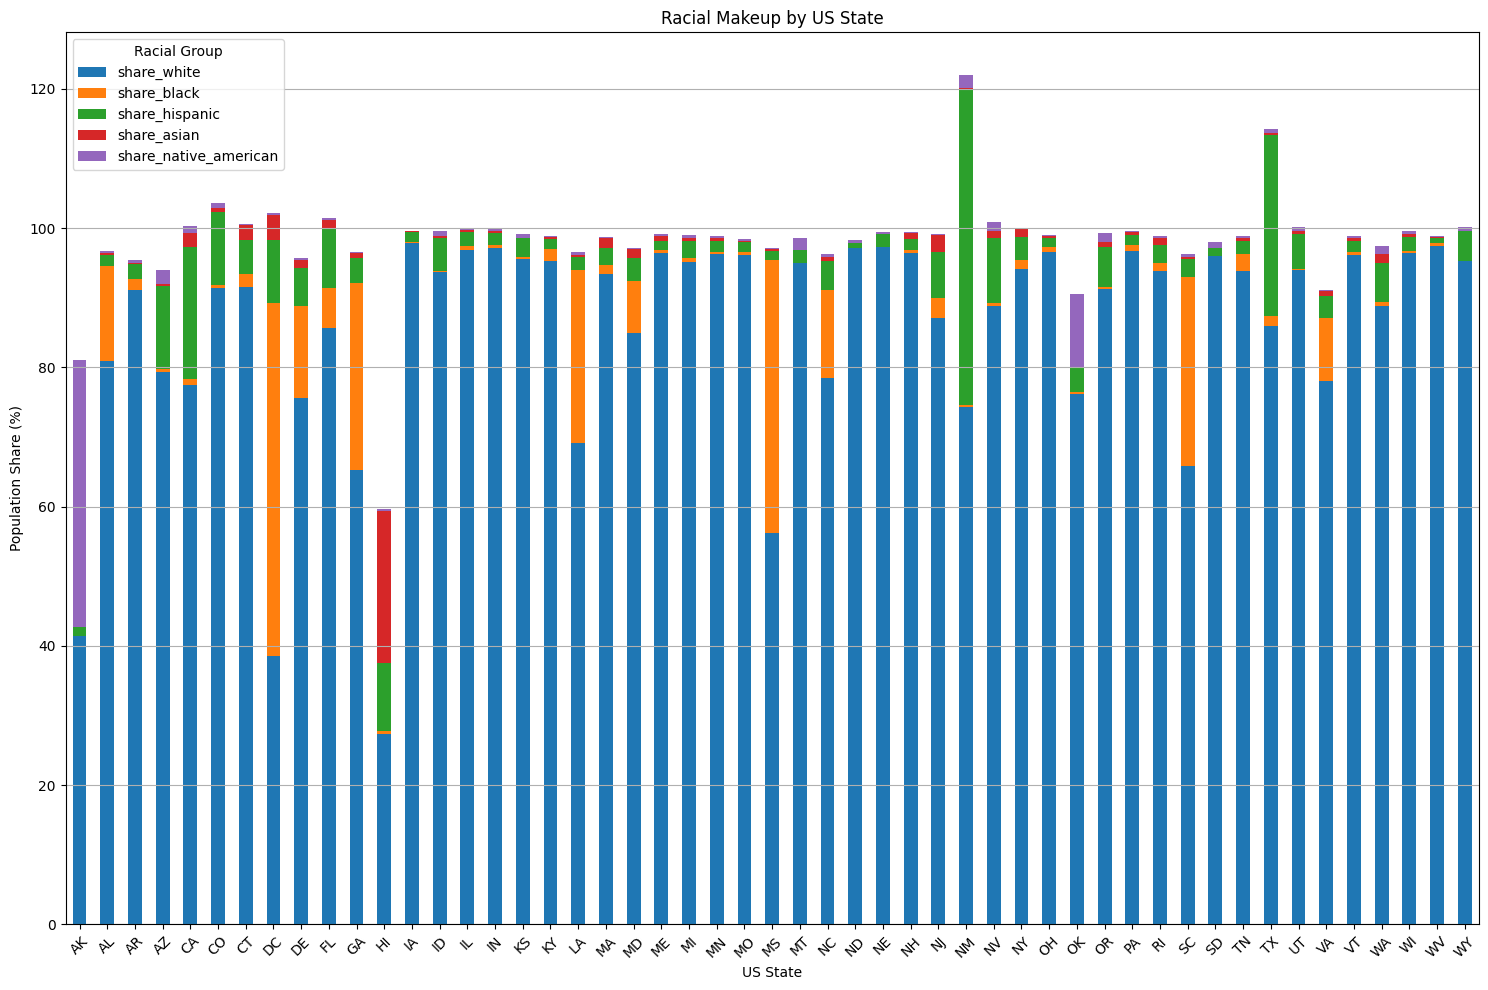

In [28]:
# Plotting the stacked bar chart
racial_grouped_df[['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']].plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Racial Makeup by US State')
plt.ylabel('Population Share (%)')
plt.xlabel('US State')
plt.legend(title='Racial Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [29]:
# Calculate the count of fatalities for each racial group
race_counts = df_fatalities['race'].value_counts()
race_counts.head()

W          1201
B           618
H           423
Unknown     195
A            39
Name: race, dtype: int64

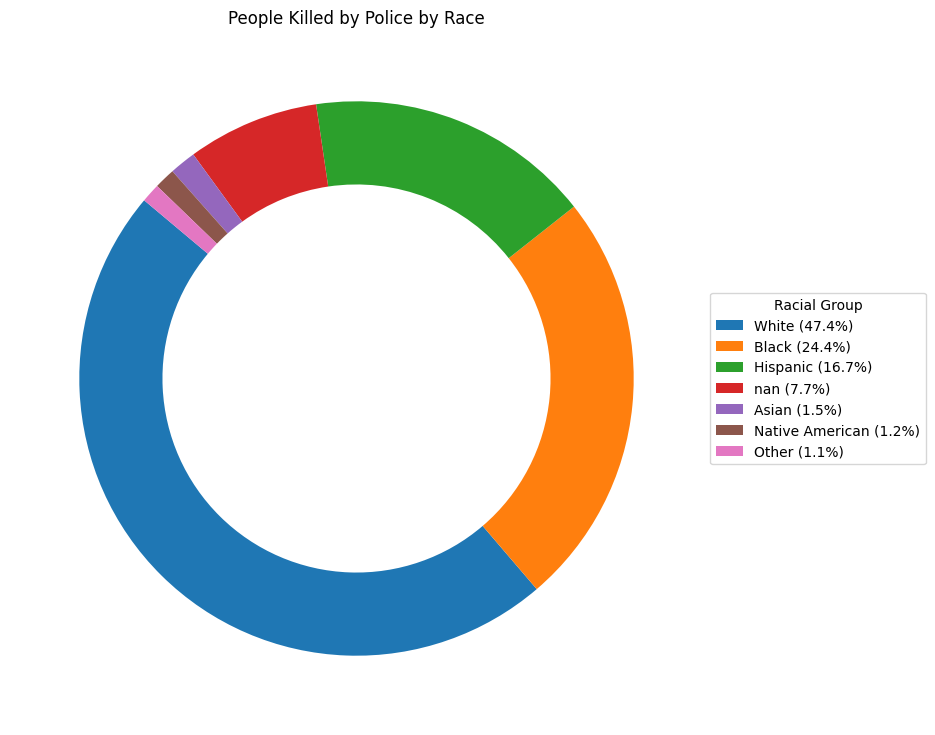

In [30]:
# Create a dictionary to map the race abbreviations to their full names
race_mapping = {
    "W": "White",
    "B": "Black",
    "A": "Asian",
    "N": "Native American",
    "H": "Hispanic",
    "O": "Other"
}

# Map the race abbreviations in the race_counts index to their full names
race_counts.index = race_counts.index.map(race_mapping)

# Calculate percentage values for the legend with full names
labels = [f'{race} ({value / sum(race_counts) * 100:.1f}%)' for race, value in race_counts.items()]

# Plotting the donut chart with full race names and a legend
plt.figure(figsize=(12, 9))
wedges, texts = plt.pie(race_counts, startangle=140, wedgeprops=dict(width=0.3))
plt.legend(wedges, labels, title="Racial Group", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('People Killed by Police by Race')
plt.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [31]:
# Calculate the count of fatalities for each gender
gender_counts = df_fatalities['gender'].value_counts()
gender_counts

M    2428
F     107
Name: gender, dtype: int64

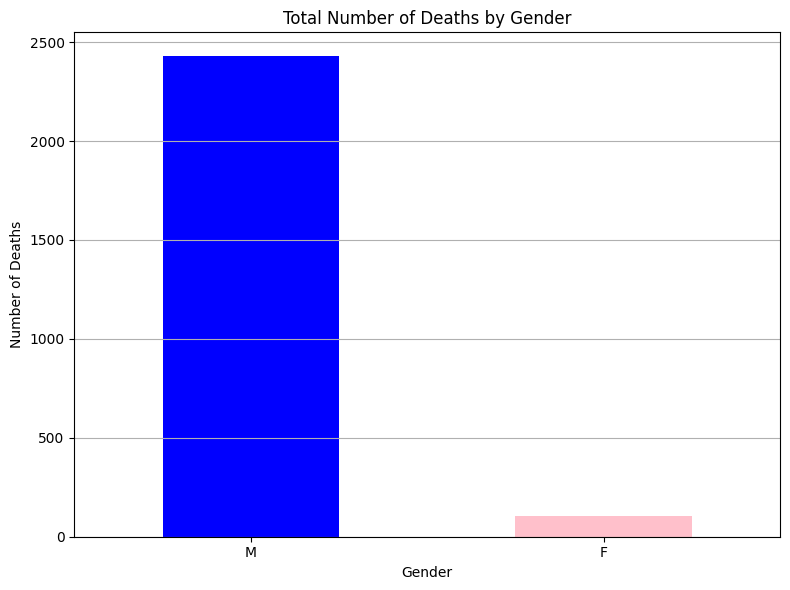

In [32]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [33]:
df_fatalities["manner_of_death"].value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

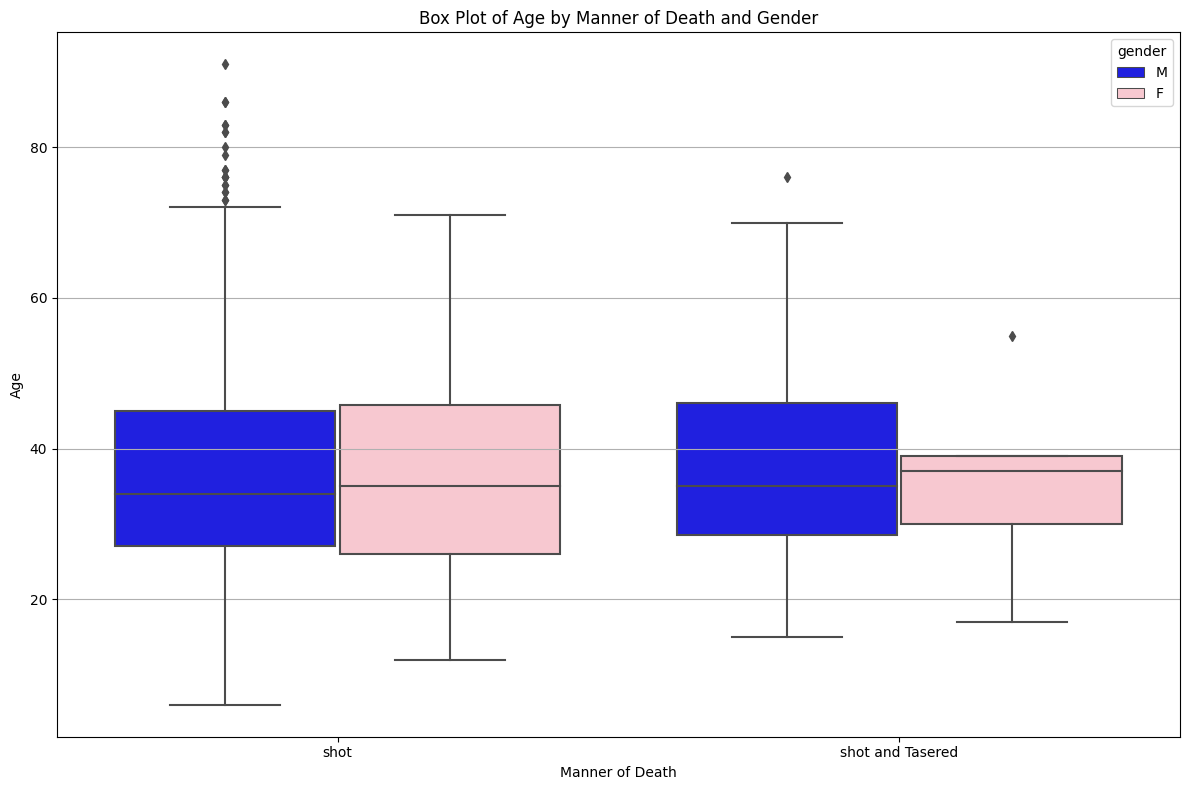

In [34]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities, palette=['blue', 'pink'])
plt.title('Box Plot of Age by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [35]:
# Calculate the count of each type of weapon
armed_counts = df_fatalities['armed'].value_counts()

# Calculate the percentage of each type of weapon
armed_percentage = (armed_counts / armed_counts.sum()) * 100

# Display the top weapons by count
armed_percentage.head()


gun            55.15
knife          14.71
vehicle         6.98
unarmed         6.75
undetermined    4.62
Name: armed, dtype: float64

<ipython-input-36-1c6a673b8f01>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  armed_counts = armed_counts.append(pd.Series(armed_counts[~armed_counts.index.isin(common_weapons)].sum(), index=['Other']))


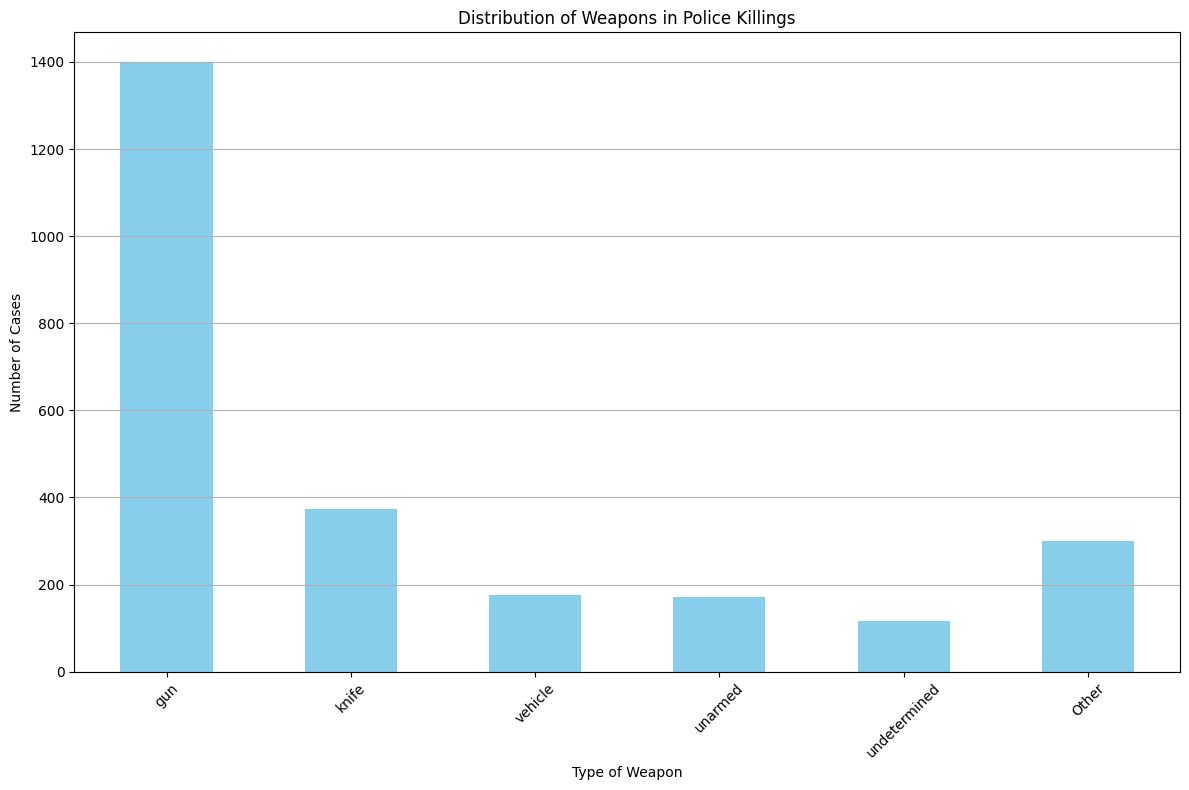

In [36]:
# Group less common weapons under 'Other' category
common_weapons = ['gun', 'knife', 'vehicle', 'unarmed', 'undetermined']
armed_counts = armed_counts.append(pd.Series(armed_counts[~armed_counts.index.isin(common_weapons)].sum(), index=['Other']))
armed_counts = armed_counts[common_weapons + ['Other']]

# Plotting the chart
plt.figure(figsize=(12, 8))
armed_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Weapons in Police Killings')
plt.xlabel('Type of Weapon')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [37]:
# Filter the dataframe for individuals under 25 years old
under_25_count = df_fatalities[df_fatalities['age'] < 25].shape[0]

# Calculate the percentage relative to the total number of fatalities
under_25_percentage = (under_25_count / df_fatalities.shape[0]) * 100

under_25_percentage

17.75147928994083

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.





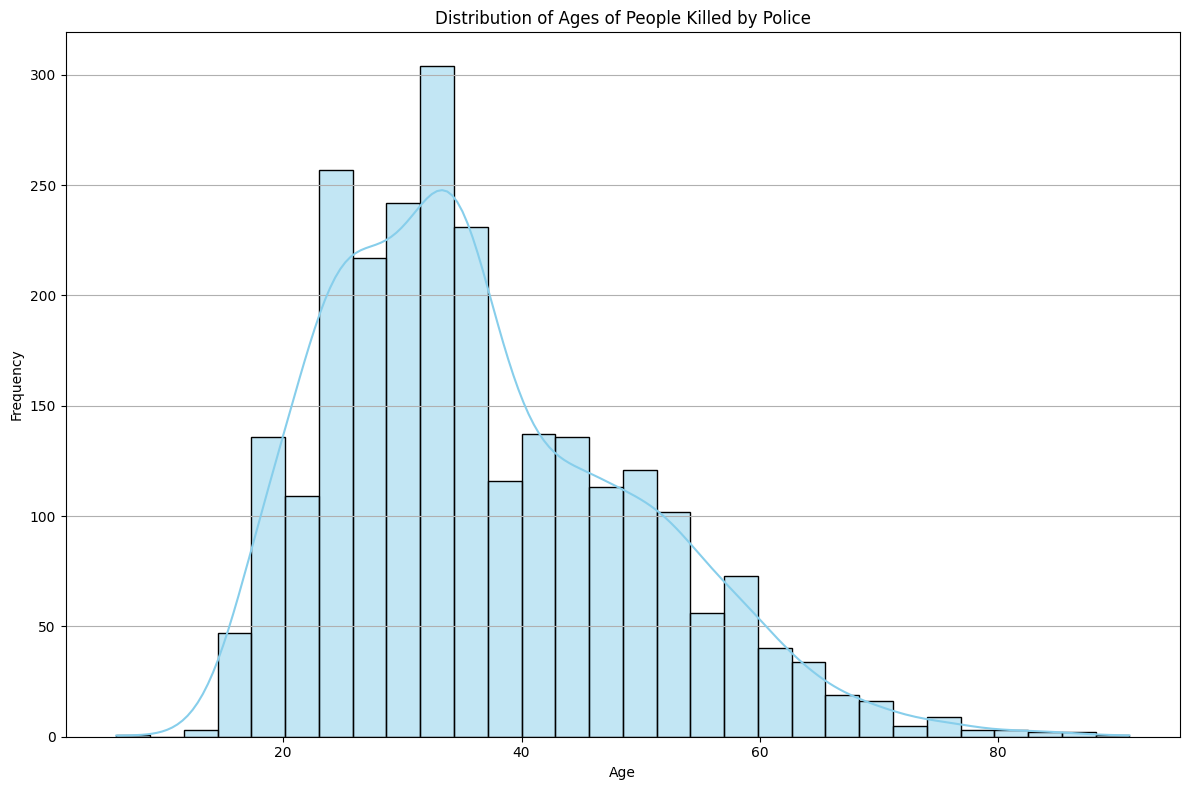

In [38]:
# Plotting the histogram and KDE plot
plt.figure(figsize=(12, 8))
sns.histplot(df_fatalities['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

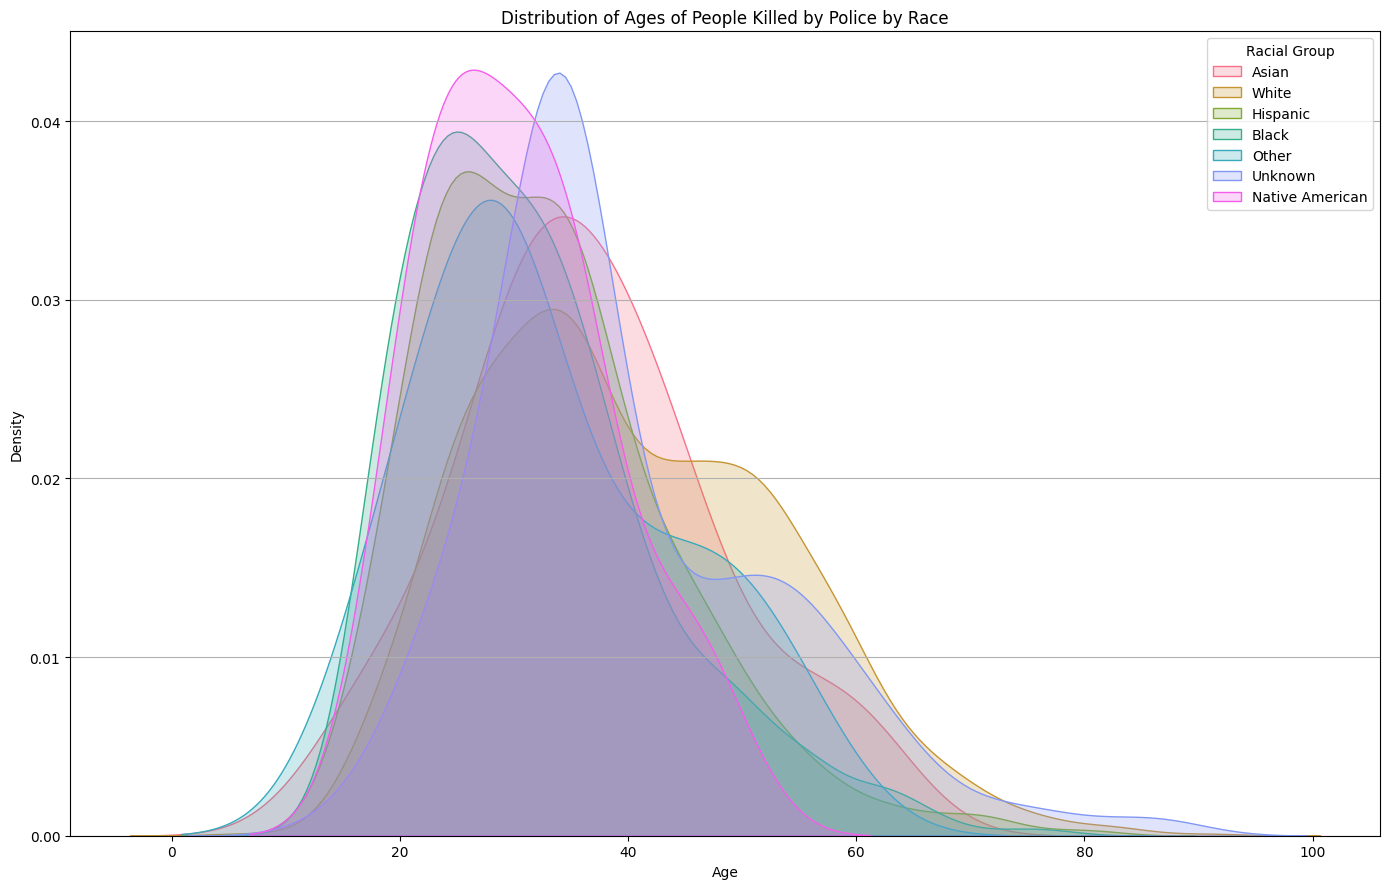

In [39]:
# Define the races and corresponding colors lists
races = df_fatalities['race'].unique().tolist()
colors = sns.color_palette("husl", len(races))

# Your existing code
plt.figure(figsize=(14, 9))

for race, color in zip(races, colors):
    subset = df_fatalities[df_fatalities['race'] == race]
    sns.kdeplot(subset['age'], label=race_mapping.get(race, "Unknown"), fill=True, color=color)

plt.title('Distribution of Ages of People Killed by Police by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Racial Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [40]:
# Calculate the count of fatalities for each racial group
race_fatalities_counts = df_fatalities['race'].value_counts()

# Map the race abbreviations to their full names for clearer visualization
race_fatalities_counts.index = race_fatalities_counts.index.map(race_mapping)

race_fatalities_counts

White              1201
Black               618
Hispanic            423
NaN                 195
Asian                39
Native American      31
Other                28
Name: race, dtype: int64

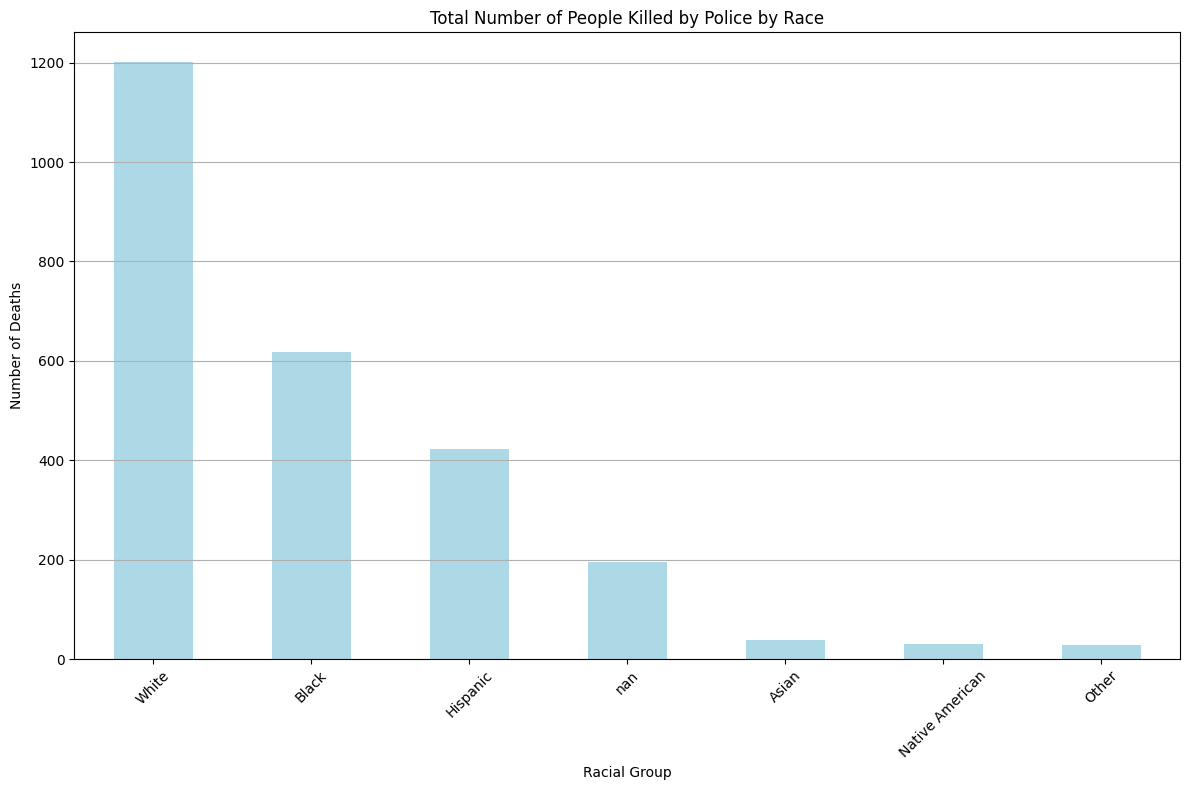

In [41]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
race_fatalities_counts.plot(kind='bar', color='lightblue')
plt.title('Total Number of People Killed by Police by Race')
plt.xlabel('Racial Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [42]:
# Calculate the count of fatalities with signs of mental illness
mental_illness_count = df_fatalities[df_fatalities['signs_of_mental_illness']].shape[0]

# Calculate the percentage relative to the total number of fatalities
mental_illness_percentage = (mental_illness_count / df_fatalities.shape[0]) * 100

mental_illness_percentage

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [43]:
# Calculate the count of fatalities for each city
city_fatalities_counts = df_fatalities['city'].value_counts()

# Get the top 10 cities with the most police killings
top_10_cities = city_fatalities_counts.head(10)

top_10_cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

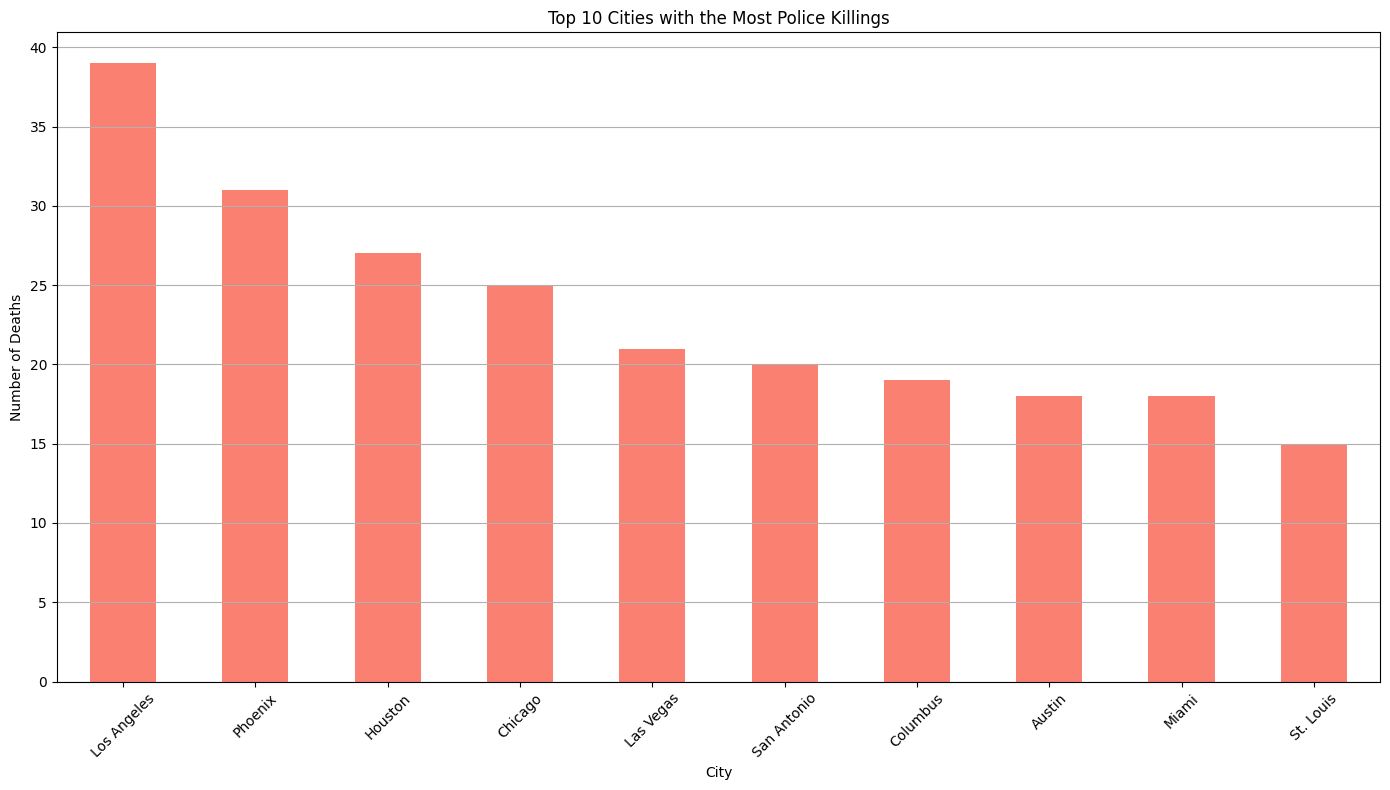

In [44]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))
top_10_cities.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('City')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [45]:
# Mapping top 10 cities to their corresponding names in the racial composition data
city_name_mapping = {
    'Los Angeles': 'Los Angeles city',
    'Phoenix': 'Phoenix city',
    'Houston': 'Houston city',
    'San Antonio': 'San Antonio city',
    'Austin': 'Austin city',
    'Miami': 'Miami city',
    'Las Vegas': 'Las Vegas city',
    'Chicago': 'Chicago city',
    'Columbus': 'Columbus city',
    'St. Louis': 'St. Louis city'
}

# Define racial composition columns
racial_columns_final = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Extracting the racial composition data for the top 10 cities using the mapping
racial_composition_mapped = df_share_race_city[df_share_race_city['City'].isin(city_name_mapping.values())]
racial_composition_mapped = racial_composition_mapped.set_index('City').loc[city_name_mapping.values()]

# Determining the state for each city in our top 10 list based on the fatalities data
city_state_mapping = df_fatalities[df_fatalities['city'].isin(city_name_mapping.keys())].groupby('city')['state'].apply(lambda x: x.value_counts().idxmax())

# Using the refined city-state mapping to extract racial composition
racial_composition_refined = racial_composition_mapped.reset_index()
racial_composition_refined = racial_composition_refined[racial_composition_refined.apply(lambda row: city_state_mapping[row['City'].replace(' city', '')] == row['Geographic area'], axis=1)]
racial_composition_refined.set_index('City', inplace=True)

# Calculating the number of fatalities for each racial group in the top 10 cities
fatalities_by_race_in_top_10 = df_fatalities[df_fatalities['city'].isin(city_name_mapping.keys())].groupby(['city', 'race']).size().unstack().fillna(0)

# Mapping the city names to match the racial composition DataFrame for merging
fatalities_by_race_in_top_10 = fatalities_by_race_in_top_10.rename(index=city_name_mapping)

# Merging the fatalities data with the racial composition data
merged_data = fatalities_by_race_in_top_10.join(racial_composition_refined[racial_columns_final])

# Calculate the rate of death for each racial group
# The rate is calculated as (number of fatalities / racial composition percentage) for each city and racial group
rate_of_death = pd.DataFrame()
rate_of_death['White'] = merged_data['W'] / merged_data['share_white']
rate_of_death['Black'] = merged_data['B'] / merged_data['share_black']
rate_of_death['Hispanic'] = merged_data['H'] / merged_data['share_hispanic']
rate_of_death['Asian'] = merged_data['A'] / merged_data['share_asian']
rate_of_death['Native American'] = merged_data['N'] / merged_data['share_native_american']
rate_of_death['Other'] = merged_data['O'] / (100 - merged_data[racial_columns_final].sum(axis=1))

rate_of_death


,White,Black,Hispanic,Asian,Native American,Other
city,,,,,,
Austin city,0.19,0.37,0.06,0.00,0.00,-0.00
Chicago city,0.04,0.64,0.03,0.00,0.00,-0.00
Columbus city,0.10,0.39,0.00,0.00,0.00,2.00
Houston city,0.06,0.63,0.14,0.17,1.43,-0.00
Las Vegas city,0.14,0.27,0.16,0.00,0.00,-0.00
Los Angeles city,0.12,1.04,0.39,0.09,0.00,-0.00
Miami city,0.04,0.42,0.09,0.00,0.00,-0.00
Phoenix city,0.18,0.31,0.27,0.00,1.36,-0.00
San Antonio city,0.04,0.43,0.19,0.00,0.00,-0.00


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [46]:
# Aggregate the number of police killings by state
killings_by_state = df_fatalities['state'].value_counts()

killings_by_state.head()

CA    424
TX    225
FL    154
AZ    118
OH     79
Name: state, dtype: int64

In [47]:
# Create a choropleth map using Plotly
fig = px.choropleth(locations=killings_by_state.index,
                    locationmode="USA-states",
                    color=killings_by_state.values,
                    scope="usa",
                    labels={'color':'Number of Fatalities'},
                    color_continuous_scale="Reds",
                    title="Police Killings by US State")

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))

fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [48]:
# Convert the 'date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

print(df_fatalities.dtypes)

# Check the first few rows to confirm the conversion
df_fatalities.head()

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


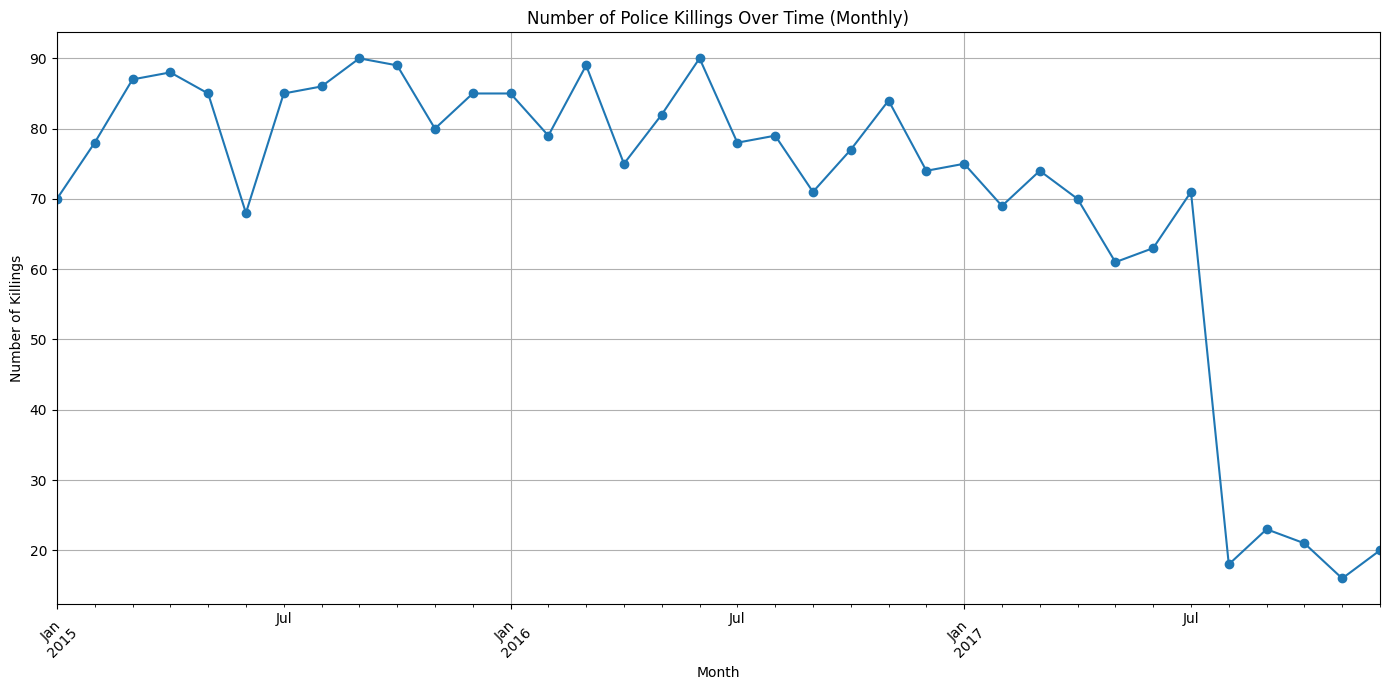

In [49]:
# Aggregate the data by month
killings_by_month = df_fatalities.groupby(df_fatalities['date'].dt.to_period("M")).size()

# Plot the aggregated data to visualize the trend over time
plt.figure(figsize=(14,7))
killings_by_month.plot(marker='o')
plt.title('Number of Police Killings Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Killings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).